In [1]:
# coding 
import math
from math import sqrt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
import requests
from statsmodels.tsa.api import Holt
#importing data frame from acquire.py file
import acquire
import prepare

In [2]:
df = acquire.all_gas_data()
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.120,2.022,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.158,2.063,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.224,2.137,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619


In [3]:
df = prepare.prep_gas_data(df)
df

,Year,State,State.Minimum.Wage,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min_dif,gas_state_min_dif,diesel_fed_min_dif,diesel_state_min_dif
Date,,,,,,,,,,,,,,,,,,,
1995-01-02,1995,Alaska,4.75,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,4.75,4.25,01-Jan,0.265176,0.237263,0.259765,0.232421
1995-01-09,1995,Alaska,4.75,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.134,1.102,4.75,4.25,01-Jan,0.266824,0.238737,0.259294,0.232000
1995-01-16,1995,Alaska,4.75,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.126,1.100,4.75,4.25,01-Jan,0.264941,0.237053,0.258824,0.231579
1995-01-23,1995,Alaska,4.75,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.132,1.095,4.75,4.25,01-Jan,0.266353,0.238316,0.257647,0.230526
1995-01-30,1995,Alaska,4.75,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.131,1.090,4.75,4.25,01-Jan,0.266118,0.238105,0.256471,0.229474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,2020,Wyoming,5.15,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.211,2.502,5.15,7.25,11-Nov,0.304966,0.429320,0.345103,0.485825
2020-12-07,2020,Wyoming,5.15,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.246,2.526,5.15,7.25,12-Dec,0.309793,0.436117,0.348414,0.490485
2020-12-14,2020,Wyoming,5.15,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.247,2.559,5.15,7.25,12-Dec,0.309931,0.436311,0.352966,0.496893


In [4]:
df.PresParty.unique()

array(['Democrat', 'Republican'], dtype=object)

In [5]:
# create dummy vars of 'presparty' column, drop the first dummy var and keep remaining. 
# In testing, I see there is one dummy var returned, 'Republican', so I 
# create a new column in our df, 'pre_is_rep', to hold the values for the new dummy var. 

df['pres_is_rep'] = pd.get_dummies(df['PresParty'], drop_first=True)['Republican']
df.drop(columns=['PresParty'], inplace=True)
df.head()


,Year,State,State.Minimum.Wage,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min_dif,gas_state_min_dif,diesel_fed_min_dif,diesel_state_min_dif,pres_is_rep
Date,,,,,,,,,,,,,,,,,,,
1995-01-02,1995,Alaska,4.75,2.80%,5.60%,2.70%,Republican,Republican,4,1.127,1.104,4.75,4.25,01-Jan,0.265176,0.237263,0.259765,0.232421,0
1995-01-09,1995,Alaska,4.75,2.80%,5.60%,2.70%,Republican,Republican,4,1.134,1.102,4.75,4.25,01-Jan,0.266824,0.238737,0.259294,0.232000,0
1995-01-16,1995,Alaska,4.75,2.80%,5.60%,2.70%,Republican,Republican,4,1.126,1.100,4.75,4.25,01-Jan,0.264941,0.237053,0.258824,0.231579,0
1995-01-23,1995,Alaska,4.75,2.80%,5.60%,2.70%,Republican,Republican,4,1.132,1.095,4.75,4.25,01-Jan,0.266353,0.238316,0.257647,0.230526,0
1995-01-30,1995,Alaska,4.75,2.80%,5.60%,2.70%,Republican,Republican,4,1.131,1.090,4.75,4.25,01-Jan,0.266118,0.238105,0.256471,0.229474,0


In [6]:
# create dummy vars of 'SenParty' column, drop the first dummy var and keep remaining. 
# In testing, I see there is one dummy var returned, 'repblican', so I 
# create a new column in our df, 'sen_is_rep', to hold the values for the new dummy var. 

df['sen_is_rep'] = pd.get_dummies(df['SenParty'], drop_first=True)['Republican']
df.drop(columns=['SenParty'], inplace=True)
df.head()


,Year,State,State.Minimum.Wage,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min_dif,gas_state_min_dif,diesel_fed_min_dif,diesel_state_min_dif,pres_is_rep,sen_is_rep
Date,,,,,,,,,,,,,,,,,,,
1995-01-02,1995,Alaska,4.75,2.80%,5.60%,2.70%,Republican,4,1.127,1.104,4.75,4.25,01-Jan,0.265176,0.237263,0.259765,0.232421,0,1
1995-01-09,1995,Alaska,4.75,2.80%,5.60%,2.70%,Republican,4,1.134,1.102,4.75,4.25,01-Jan,0.266824,0.238737,0.259294,0.232000,0,1
1995-01-16,1995,Alaska,4.75,2.80%,5.60%,2.70%,Republican,4,1.126,1.100,4.75,4.25,01-Jan,0.264941,0.237053,0.258824,0.231579,0,1
1995-01-23,1995,Alaska,4.75,2.80%,5.60%,2.70%,Republican,4,1.132,1.095,4.75,4.25,01-Jan,0.266353,0.238316,0.257647,0.230526,0,1
1995-01-30,1995,Alaska,4.75,2.80%,5.60%,2.70%,Republican,4,1.131,1.090,4.75,4.25,01-Jan,0.266118,0.238105,0.256471,0.229474,0,1


In [7]:
# create dummy vars of 'SenParty' column, drop the first dummy var and keep remaining. 
# In testing, I see there is one dummy var returned, 'repblican', so I 
# create a new column in our df, 'sen_is_rep', to hold the values for the new dummy var. 

df['house_is_rep'] = pd.get_dummies(df['HouseParty'], drop_first=True)['Republican']
df.drop(columns=['HouseParty'], inplace=True)
df.head()

,Year,State,State.Minimum.Wage,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min_dif,gas_state_min_dif,diesel_fed_min_dif,diesel_state_min_dif,pres_is_rep,sen_is_rep,house_is_rep
Date,,,,,,,,,,,,,,,,,,,
1995-01-02,1995,Alaska,4.75,2.80%,5.60%,2.70%,4,1.127,1.104,4.75,4.25,01-Jan,0.265176,0.237263,0.259765,0.232421,0,1,1
1995-01-09,1995,Alaska,4.75,2.80%,5.60%,2.70%,4,1.134,1.102,4.75,4.25,01-Jan,0.266824,0.238737,0.259294,0.232000,0,1,1
1995-01-16,1995,Alaska,4.75,2.80%,5.60%,2.70%,4,1.126,1.100,4.75,4.25,01-Jan,0.264941,0.237053,0.258824,0.231579,0,1,1
1995-01-23,1995,Alaska,4.75,2.80%,5.60%,2.70%,4,1.132,1.095,4.75,4.25,01-Jan,0.266353,0.238316,0.257647,0.230526,0,1,1
1995-01-30,1995,Alaska,4.75,2.80%,5.60%,2.70%,4,1.131,1.090,4.75,4.25,01-Jan,0.266118,0.238105,0.256471,0.229474,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55361 entries, 1995-01-02 to 2020-12-28
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      55361 non-null  int64  
 1   State                     55361 non-null  object 
 2   State.Minimum.Wage        55361 non-null  float64
 3   MeanAnnualInflation       55361 non-null  object 
 4   UnemploymentRateDecember  55361 non-null  object 
 5   GDP_AnnualGrowth          55361 non-null  object 
 6   YearsSinceLastChange      55361 non-null  int64  
 7   gasoline                  55361 non-null  float64
 8   diesel                    55361 non-null  float64
 9   state_wage                55361 non-null  float64
 10  fed_wage                  55361 non-null  float64
 11  month                     55361 non-null  object 
 12  gas_fed_min_dif           55361 non-null  float64
 13  gas_state_min_dif         55361 non-null  fl

In [9]:
df

,Year,State,State.Minimum.Wage,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min_dif,gas_state_min_dif,diesel_fed_min_dif,diesel_state_min_dif,pres_is_rep,sen_is_rep,house_is_rep
Date,,,,,,,,,,,,,,,,,,,
1995-01-02,1995,Alaska,4.75,2.80%,5.60%,2.70%,4,1.127,1.104,4.75,4.25,01-Jan,0.265176,0.237263,0.259765,0.232421,0,1,1
1995-01-09,1995,Alaska,4.75,2.80%,5.60%,2.70%,4,1.134,1.102,4.75,4.25,01-Jan,0.266824,0.238737,0.259294,0.232000,0,1,1
1995-01-16,1995,Alaska,4.75,2.80%,5.60%,2.70%,4,1.126,1.100,4.75,4.25,01-Jan,0.264941,0.237053,0.258824,0.231579,0,1,1
1995-01-23,1995,Alaska,4.75,2.80%,5.60%,2.70%,4,1.132,1.095,4.75,4.25,01-Jan,0.266353,0.238316,0.257647,0.230526,0,1,1
1995-01-30,1995,Alaska,4.75,2.80%,5.60%,2.70%,4,1.131,1.090,4.75,4.25,01-Jan,0.266118,0.238105,0.256471,0.229474,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,2020,Wyoming,5.15,1.20%,6.70%,-3.40%,11,2.211,2.502,5.15,7.25,11-Nov,0.304966,0.429320,0.345103,0.485825,1,1,0
2020-12-07,2020,Wyoming,5.15,1.20%,6.70%,-3.40%,11,2.246,2.526,5.15,7.25,12-Dec,0.309793,0.436117,0.348414,0.490485,1,1,0
2020-12-14,2020,Wyoming,5.15,1.20%,6.70%,-3.40%,11,2.247,2.559,5.15,7.25,12-Dec,0.309931,0.436311,0.352966,0.496893,1,1,0


### splitting data

In [10]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)


train observations:  589019
validate observations:  252453
test observations:  210387


Ask Questions
Target Variable: Gasoline(prices)

Questions to answer &/or hypotheses to test:

What is the distribution of each of the variables? This is important as we move forward into testing and modeling.

Do gasoline prices differ across political parties?

Is there a relationship between gasoline prices and federal wage? (Linear or otherwise).

Is there a relationship between statewages and  gasoline prices? (Linear or otherwise).

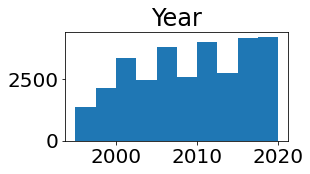

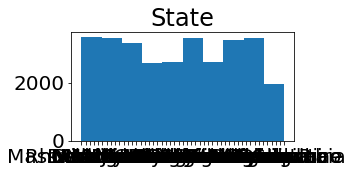

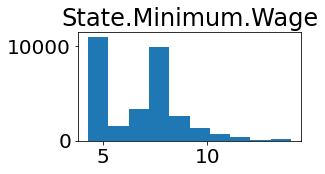

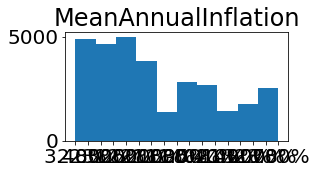

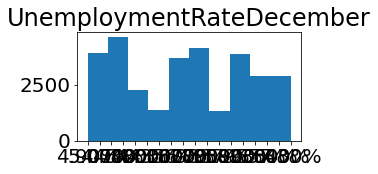

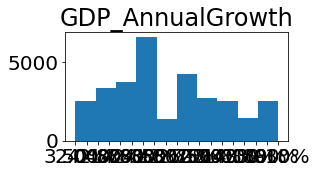

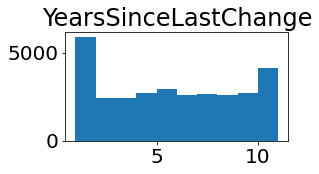

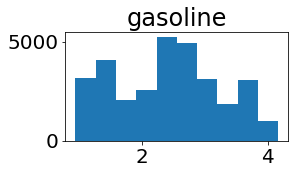

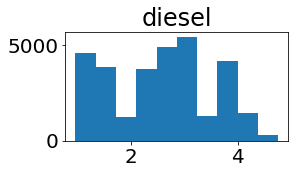

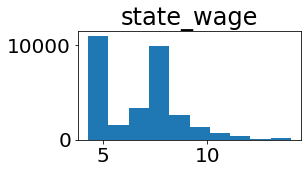

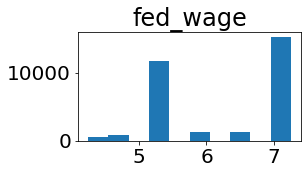

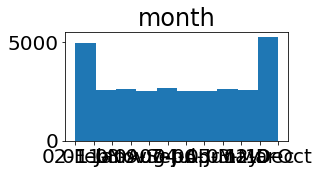

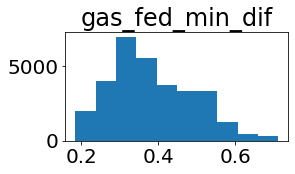

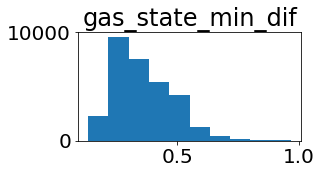

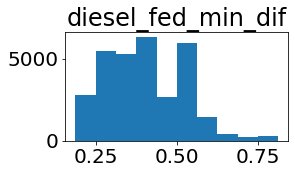

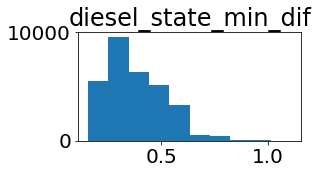

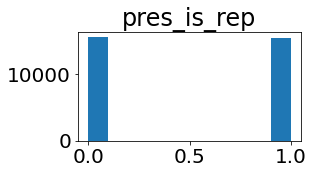

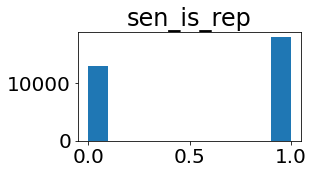

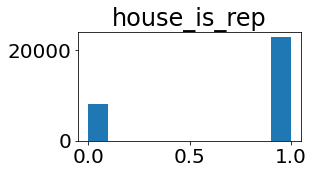

In [11]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

- gasoline prices have normal distribution
- years since last change has norma distribution
- fed_wage has a high of 5 and 7 
- there seem to be a higher amount of democrats as presidents
- there seem to be a higher amount of republicans that have controlled the senate
- the house has been controlled majorily by the senate.

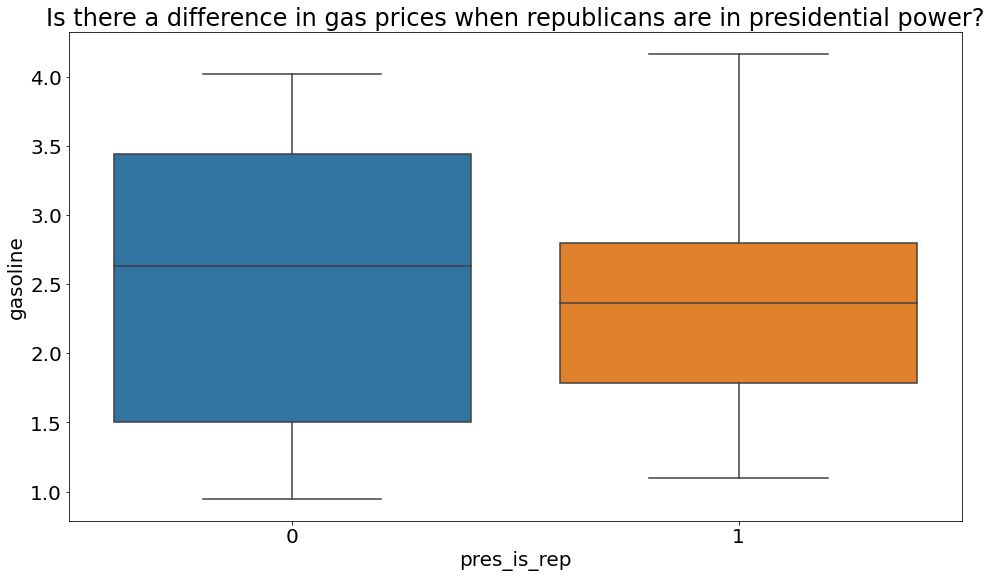

In [12]:
sns.boxplot(train.pres_is_rep, train.gasoline)
plt.title("Is there a difference in gas prices when republicans are in presidential power?")
plt.show()


takeaway: the mean seems to be the same.

In [13]:
# test the equal variance 
# H0 is that the variances are equal
# Levene test
# our two groups are 1) where train.pres_is_rep==0 and 
# 2) where train.pres_is_rep == 1

stats.levene(train[train.pres_is_rep==0].gasoline, 
             train[train.pres_is_rep==1].gasoline)


LeveneResult(statistic=4125.839306599259, pvalue=0.0)

In [14]:
stats.ttest_ind(train[train.pres_is_rep==0].gasoline, 
             train[train.pres_is_rep==1].gasoline, 
                equal_var=True
               )

Ttest_indResult(statistic=17.821718637181466, pvalue=1.0810490227009807e-70)